# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


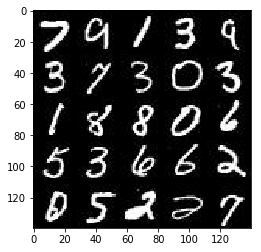

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

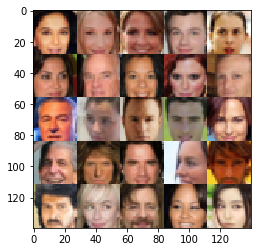

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_image = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='input_image')
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')

    return input_image, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(x, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        #input 28*28*x
        x1 = tf.layers.conv2d(x, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14*14*64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7*7*128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=1, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 7x7x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, training=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not training):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=training)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
            
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
    
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28 now
    
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [27]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [35]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    "train(net, z_dim, epochs, batch_size, print_every=10, show_every=100, figsize=(5,5)):"
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    samples, width, height, channels = data_shape
    inputR, inputZ, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(inputR, inputZ, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    print_every = 10
    show_every = 100
    
    samples, losses = [], []
    steps = 0
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={inputR: batch_images, inputZ: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={inputR: batch_images, inputZ: batch_z, lr: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputZ: batch_z, inputR: batch_images})
                    train_loss_g = g_loss.eval({inputZ: batch_z, inputR: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, inputZ, channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.2070... Generator Loss: 0.6153
Epoch 1/2... Discriminator Loss: 2.2758... Generator Loss: 0.1985
Epoch 1/2... Discriminator Loss: 1.5005... Generator Loss: 1.0814
Epoch 1/2... Discriminator Loss: 1.4938... Generator Loss: 0.4268
Epoch 1/2... Discriminator Loss: 1.3153... Generator Loss: 0.6728
Epoch 1/2... Discriminator Loss: 1.5432... Generator Loss: 0.5323
Epoch 1/2... Discriminator Loss: 1.5822... Generator Loss: 0.3828
Epoch 1/2... Discriminator Loss: 1.6837... Generator Loss: 1.3913
Epoch 1/2... Discriminator Loss: 1.4058... Generator Loss: 0.4950
Epoch 1/2... Discriminator Loss: 1.3382... Generator Loss: 0.6649


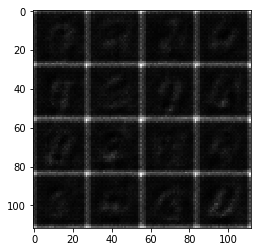

Epoch 1/2... Discriminator Loss: 1.1357... Generator Loss: 0.9074
Epoch 1/2... Discriminator Loss: 1.1953... Generator Loss: 0.7882
Epoch 1/2... Discriminator Loss: 1.2665... Generator Loss: 1.0532
Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 1.1269
Epoch 1/2... Discriminator Loss: 1.5376... Generator Loss: 0.3336
Epoch 1/2... Discriminator Loss: 1.0396... Generator Loss: 0.7957
Epoch 1/2... Discriminator Loss: 1.1675... Generator Loss: 1.2972
Epoch 1/2... Discriminator Loss: 1.1530... Generator Loss: 0.5939
Epoch 1/2... Discriminator Loss: 1.1951... Generator Loss: 1.3143
Epoch 1/2... Discriminator Loss: 1.0110... Generator Loss: 0.6618


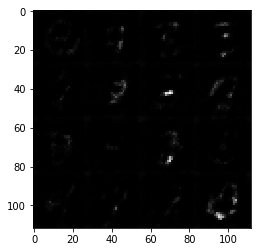

Epoch 1/2... Discriminator Loss: 1.0075... Generator Loss: 0.8739
Epoch 1/2... Discriminator Loss: 1.0419... Generator Loss: 1.3419
Epoch 1/2... Discriminator Loss: 1.1758... Generator Loss: 0.5273
Epoch 1/2... Discriminator Loss: 0.9317... Generator Loss: 0.8920
Epoch 1/2... Discriminator Loss: 0.9794... Generator Loss: 0.7958
Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 0.7389
Epoch 1/2... Discriminator Loss: 0.9095... Generator Loss: 2.0804
Epoch 1/2... Discriminator Loss: 1.0838... Generator Loss: 1.8019
Epoch 1/2... Discriminator Loss: 0.7849... Generator Loss: 1.0621
Epoch 1/2... Discriminator Loss: 0.9656... Generator Loss: 1.8128


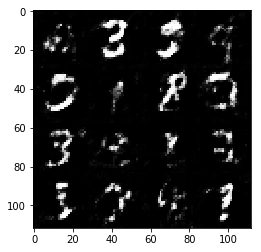

Epoch 1/2... Discriminator Loss: 0.9321... Generator Loss: 0.7543
Epoch 1/2... Discriminator Loss: 0.8729... Generator Loss: 1.6999
Epoch 1/2... Discriminator Loss: 0.7705... Generator Loss: 1.0701
Epoch 1/2... Discriminator Loss: 0.7843... Generator Loss: 0.8332
Epoch 1/2... Discriminator Loss: 0.7776... Generator Loss: 1.1185
Epoch 1/2... Discriminator Loss: 0.7310... Generator Loss: 1.1731
Epoch 1/2... Discriminator Loss: 0.8697... Generator Loss: 0.8618
Epoch 1/2... Discriminator Loss: 1.0571... Generator Loss: 0.5686
Epoch 1/2... Discriminator Loss: 0.7062... Generator Loss: 1.9165
Epoch 1/2... Discriminator Loss: 1.0716... Generator Loss: 0.6655


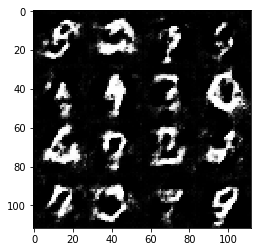

Epoch 1/2... Discriminator Loss: 0.8114... Generator Loss: 1.4883
Epoch 1/2... Discriminator Loss: 0.9326... Generator Loss: 0.7861
Epoch 1/2... Discriminator Loss: 1.0144... Generator Loss: 1.9954
Epoch 1/2... Discriminator Loss: 1.1086... Generator Loss: 0.5815
Epoch 1/2... Discriminator Loss: 0.9256... Generator Loss: 1.0435
Epoch 1/2... Discriminator Loss: 1.2899... Generator Loss: 0.4977
Epoch 1/2... Discriminator Loss: 1.3727... Generator Loss: 0.4007
Epoch 1/2... Discriminator Loss: 1.2283... Generator Loss: 0.4655
Epoch 1/2... Discriminator Loss: 0.9947... Generator Loss: 0.9621
Epoch 1/2... Discriminator Loss: 1.0811... Generator Loss: 0.6057


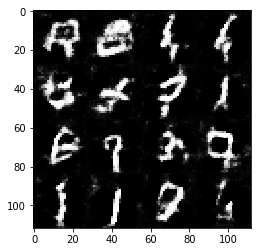

Epoch 1/2... Discriminator Loss: 1.1323... Generator Loss: 0.6303
Epoch 1/2... Discriminator Loss: 1.2245... Generator Loss: 0.5135
Epoch 1/2... Discriminator Loss: 1.1100... Generator Loss: 1.1789
Epoch 1/2... Discriminator Loss: 1.2457... Generator Loss: 0.4899
Epoch 1/2... Discriminator Loss: 1.0749... Generator Loss: 0.7331
Epoch 1/2... Discriminator Loss: 1.0027... Generator Loss: 1.0207
Epoch 1/2... Discriminator Loss: 1.1643... Generator Loss: 0.7038
Epoch 1/2... Discriminator Loss: 1.0655... Generator Loss: 0.7038
Epoch 1/2... Discriminator Loss: 1.1357... Generator Loss: 0.6013
Epoch 1/2... Discriminator Loss: 0.9694... Generator Loss: 0.7692


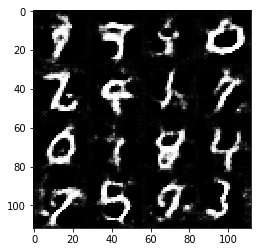

Epoch 1/2... Discriminator Loss: 0.9280... Generator Loss: 0.9074
Epoch 1/2... Discriminator Loss: 0.9301... Generator Loss: 1.1523
Epoch 1/2... Discriminator Loss: 1.0541... Generator Loss: 0.9912
Epoch 1/2... Discriminator Loss: 1.0130... Generator Loss: 0.8801
Epoch 1/2... Discriminator Loss: 1.0617... Generator Loss: 1.0727
Epoch 1/2... Discriminator Loss: 0.9933... Generator Loss: 0.9317
Epoch 1/2... Discriminator Loss: 1.2821... Generator Loss: 0.4610
Epoch 1/2... Discriminator Loss: 0.8187... Generator Loss: 1.0749
Epoch 1/2... Discriminator Loss: 1.1078... Generator Loss: 1.3336
Epoch 1/2... Discriminator Loss: 1.1889... Generator Loss: 1.5610


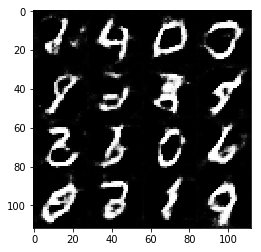

Epoch 1/2... Discriminator Loss: 1.2588... Generator Loss: 0.4357
Epoch 1/2... Discriminator Loss: 0.9737... Generator Loss: 1.0425
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 1.0818
Epoch 1/2... Discriminator Loss: 1.0110... Generator Loss: 0.9779
Epoch 1/2... Discriminator Loss: 1.0202... Generator Loss: 1.3244
Epoch 1/2... Discriminator Loss: 1.0897... Generator Loss: 0.6324
Epoch 1/2... Discriminator Loss: 0.9616... Generator Loss: 0.9306
Epoch 1/2... Discriminator Loss: 1.0798... Generator Loss: 0.6614
Epoch 1/2... Discriminator Loss: 1.0118... Generator Loss: 0.7927
Epoch 1/2... Discriminator Loss: 1.0901... Generator Loss: 0.7444


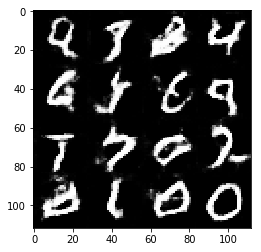

Epoch 1/2... Discriminator Loss: 0.9466... Generator Loss: 1.1265
Epoch 1/2... Discriminator Loss: 0.9908... Generator Loss: 0.8327
Epoch 1/2... Discriminator Loss: 0.9818... Generator Loss: 1.2304
Epoch 1/2... Discriminator Loss: 1.0107... Generator Loss: 1.2662
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.4731
Epoch 1/2... Discriminator Loss: 1.1733... Generator Loss: 0.5546
Epoch 1/2... Discriminator Loss: 1.1625... Generator Loss: 0.5484
Epoch 1/2... Discriminator Loss: 1.0288... Generator Loss: 1.3819
Epoch 1/2... Discriminator Loss: 1.0769... Generator Loss: 0.6378
Epoch 1/2... Discriminator Loss: 1.2779... Generator Loss: 0.4640


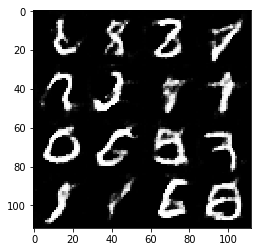

Epoch 1/2... Discriminator Loss: 1.1130... Generator Loss: 1.8213
Epoch 1/2... Discriminator Loss: 0.9340... Generator Loss: 1.0255
Epoch 1/2... Discriminator Loss: 1.0024... Generator Loss: 0.7183
Epoch 2/2... Discriminator Loss: 1.0412... Generator Loss: 0.6621
Epoch 2/2... Discriminator Loss: 1.3249... Generator Loss: 0.4312
Epoch 2/2... Discriminator Loss: 0.9797... Generator Loss: 0.8241
Epoch 2/2... Discriminator Loss: 0.8131... Generator Loss: 1.2778
Epoch 2/2... Discriminator Loss: 0.8595... Generator Loss: 0.9031
Epoch 2/2... Discriminator Loss: 1.2802... Generator Loss: 0.4583
Epoch 2/2... Discriminator Loss: 0.9950... Generator Loss: 0.9225


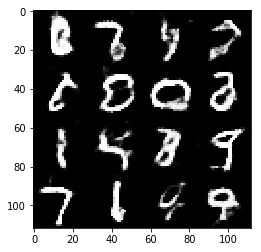

Epoch 2/2... Discriminator Loss: 0.9949... Generator Loss: 0.6162
Epoch 2/2... Discriminator Loss: 1.1099... Generator Loss: 1.4074
Epoch 2/2... Discriminator Loss: 1.0832... Generator Loss: 0.5785
Epoch 2/2... Discriminator Loss: 0.9979... Generator Loss: 0.7589
Epoch 2/2... Discriminator Loss: 1.8261... Generator Loss: 0.2570
Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 0.7266
Epoch 2/2... Discriminator Loss: 0.9521... Generator Loss: 0.9553
Epoch 2/2... Discriminator Loss: 0.9357... Generator Loss: 0.8811
Epoch 2/2... Discriminator Loss: 1.2533... Generator Loss: 0.4378
Epoch 2/2... Discriminator Loss: 1.1796... Generator Loss: 0.5161


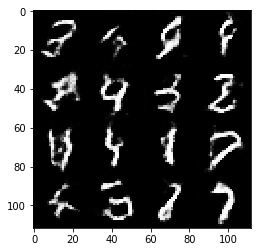

Epoch 2/2... Discriminator Loss: 0.9016... Generator Loss: 0.8343
Epoch 2/2... Discriminator Loss: 0.9819... Generator Loss: 0.7222
Epoch 2/2... Discriminator Loss: 1.3648... Generator Loss: 1.7977
Epoch 2/2... Discriminator Loss: 0.8371... Generator Loss: 1.0427
Epoch 2/2... Discriminator Loss: 0.9413... Generator Loss: 0.8726
Epoch 2/2... Discriminator Loss: 0.8788... Generator Loss: 0.9744
Epoch 2/2... Discriminator Loss: 0.9268... Generator Loss: 0.7479
Epoch 2/2... Discriminator Loss: 0.8389... Generator Loss: 0.9214
Epoch 2/2... Discriminator Loss: 0.7512... Generator Loss: 1.0349
Epoch 2/2... Discriminator Loss: 1.4767... Generator Loss: 2.5645


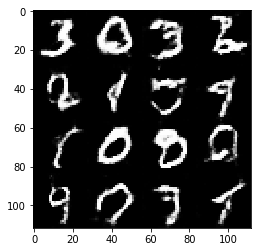

Epoch 2/2... Discriminator Loss: 0.8090... Generator Loss: 0.8420
Epoch 2/2... Discriminator Loss: 0.8808... Generator Loss: 1.4607
Epoch 2/2... Discriminator Loss: 1.5638... Generator Loss: 0.3065
Epoch 2/2... Discriminator Loss: 1.1426... Generator Loss: 0.5584
Epoch 2/2... Discriminator Loss: 0.8306... Generator Loss: 1.1892
Epoch 2/2... Discriminator Loss: 1.0042... Generator Loss: 1.9872
Epoch 2/2... Discriminator Loss: 0.9445... Generator Loss: 0.7180
Epoch 2/2... Discriminator Loss: 0.9039... Generator Loss: 0.8960
Epoch 2/2... Discriminator Loss: 1.1318... Generator Loss: 0.5706
Epoch 2/2... Discriminator Loss: 0.9020... Generator Loss: 0.8724


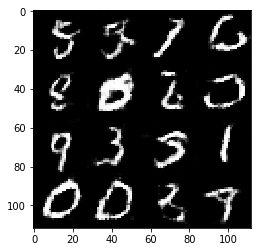

Epoch 2/2... Discriminator Loss: 0.7926... Generator Loss: 0.9964
Epoch 2/2... Discriminator Loss: 0.8340... Generator Loss: 0.7982
Epoch 2/2... Discriminator Loss: 0.9193... Generator Loss: 0.7117
Epoch 2/2... Discriminator Loss: 2.5515... Generator Loss: 3.2138
Epoch 2/2... Discriminator Loss: 0.8606... Generator Loss: 1.4014
Epoch 2/2... Discriminator Loss: 0.9429... Generator Loss: 0.7805
Epoch 2/2... Discriminator Loss: 0.9429... Generator Loss: 0.8379
Epoch 2/2... Discriminator Loss: 0.8222... Generator Loss: 0.9405
Epoch 2/2... Discriminator Loss: 0.9651... Generator Loss: 0.7582
Epoch 2/2... Discriminator Loss: 0.9620... Generator Loss: 0.7100


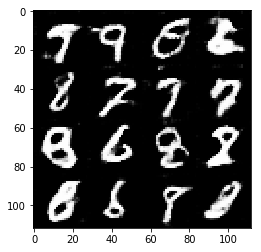

Epoch 2/2... Discriminator Loss: 1.0073... Generator Loss: 2.0609
Epoch 2/2... Discriminator Loss: 0.8591... Generator Loss: 1.0035
Epoch 2/2... Discriminator Loss: 0.9396... Generator Loss: 0.8155
Epoch 2/2... Discriminator Loss: 0.9208... Generator Loss: 0.8156
Epoch 2/2... Discriminator Loss: 0.8835... Generator Loss: 0.8585
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 0.8125
Epoch 2/2... Discriminator Loss: 0.8274... Generator Loss: 0.9930
Epoch 2/2... Discriminator Loss: 1.1473... Generator Loss: 2.3170
Epoch 2/2... Discriminator Loss: 1.2064... Generator Loss: 0.5602
Epoch 2/2... Discriminator Loss: 1.0000... Generator Loss: 0.7513


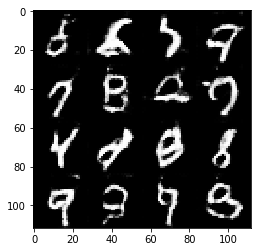

Epoch 2/2... Discriminator Loss: 1.4189... Generator Loss: 0.3975
Epoch 2/2... Discriminator Loss: 1.0576... Generator Loss: 0.5991
Epoch 2/2... Discriminator Loss: 0.9165... Generator Loss: 0.7392
Epoch 2/2... Discriminator Loss: 1.3617... Generator Loss: 0.3911
Epoch 2/2... Discriminator Loss: 1.1105... Generator Loss: 0.5596
Epoch 2/2... Discriminator Loss: 1.0174... Generator Loss: 0.6647
Epoch 2/2... Discriminator Loss: 0.9616... Generator Loss: 0.7505
Epoch 2/2... Discriminator Loss: 0.8092... Generator Loss: 1.2286
Epoch 2/2... Discriminator Loss: 0.9035... Generator Loss: 1.0997
Epoch 2/2... Discriminator Loss: 0.9890... Generator Loss: 0.6949


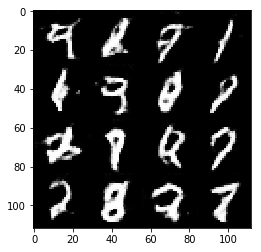

Epoch 2/2... Discriminator Loss: 1.3222... Generator Loss: 0.4631
Epoch 2/2... Discriminator Loss: 0.4176... Generator Loss: 1.7254
Epoch 2/2... Discriminator Loss: 0.8728... Generator Loss: 0.8866
Epoch 2/2... Discriminator Loss: 0.7295... Generator Loss: 1.2472
Epoch 2/2... Discriminator Loss: 1.3019... Generator Loss: 0.8259
Epoch 2/2... Discriminator Loss: 0.9222... Generator Loss: 0.9198
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 0.6521
Epoch 2/2... Discriminator Loss: 0.7245... Generator Loss: 1.2506
Epoch 2/2... Discriminator Loss: 0.8879... Generator Loss: 0.8063
Epoch 2/2... Discriminator Loss: 0.8112... Generator Loss: 0.8583


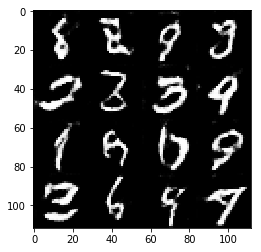

Epoch 2/2... Discriminator Loss: 0.8077... Generator Loss: 0.8301
Epoch 2/2... Discriminator Loss: 0.6464... Generator Loss: 1.1221
Epoch 2/2... Discriminator Loss: 0.8213... Generator Loss: 1.0352
Epoch 2/2... Discriminator Loss: 0.9365... Generator Loss: 1.5182
Epoch 2/2... Discriminator Loss: 0.9065... Generator Loss: 0.7815
Epoch 2/2... Discriminator Loss: 0.8350... Generator Loss: 1.0351
Epoch 2/2... Discriminator Loss: 1.0892... Generator Loss: 0.5766
Epoch 2/2... Discriminator Loss: 0.7834... Generator Loss: 1.4113
Epoch 2/2... Discriminator Loss: 0.9932... Generator Loss: 0.6817
Epoch 2/2... Discriminator Loss: 2.7467... Generator Loss: 3.7113


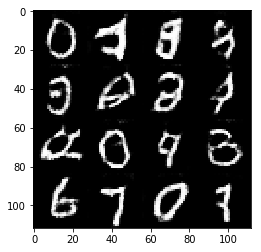

Epoch 2/2... Discriminator Loss: 0.8943... Generator Loss: 1.3708
Epoch 2/2... Discriminator Loss: 0.9329... Generator Loss: 0.7985
Epoch 2/2... Discriminator Loss: 0.8461... Generator Loss: 0.8891
Epoch 2/2... Discriminator Loss: 1.0410... Generator Loss: 0.5799
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 0.6247
Epoch 2/2... Discriminator Loss: 0.9992... Generator Loss: 0.6302
Epoch 2/2... Discriminator Loss: 0.8521... Generator Loss: 0.8805


In [39]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.9831... Generator Loss: 0.3636
Epoch 1/1... Discriminator Loss: 0.9899... Generator Loss: 0.7806
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 0.7769... Generator Loss: 1.1033
Epoch 1/1... Discriminator Loss: 0.6262... Generator Loss: 1.5847
Epoch 1/1... Discriminator Loss: 1.5606... Generator Loss: 0.2887
Epoch 1/1... Discriminator Loss: 0.7719... Generator Loss: 2.5425
Epoch 1/1... Discriminator Loss: 0.6688... Generator Loss: 1.0278
Epoch 1/1... Discriminator Loss: 1.9556... Generator Loss: 0.2287
Epoch 1/1... Discriminator Loss: 0.3898... Generator Loss: 1.9589


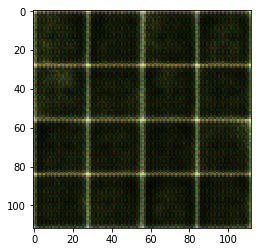

Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 5.6628
Epoch 1/1... Discriminator Loss: 0.5207... Generator Loss: 3.0345
Epoch 1/1... Discriminator Loss: 0.6752... Generator Loss: 1.3024
Epoch 1/1... Discriminator Loss: 1.1143... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.1545... Generator Loss: 4.0211
Epoch 1/1... Discriminator Loss: 1.6754... Generator Loss: 0.3173
Epoch 1/1... Discriminator Loss: 0.9776... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 0.6801... Generator Loss: 3.4018
Epoch 1/1... Discriminator Loss: 0.3610... Generator Loss: 2.0691
Epoch 1/1... Discriminator Loss: 0.6604... Generator Loss: 3.7305


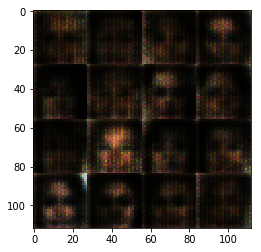

Epoch 1/1... Discriminator Loss: 0.1594... Generator Loss: 3.0421
Epoch 1/1... Discriminator Loss: 0.9119... Generator Loss: 0.8266
Epoch 1/1... Discriminator Loss: 0.3516... Generator Loss: 2.1110
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 4.4360
Epoch 1/1... Discriminator Loss: 0.4768... Generator Loss: 2.4552
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.4345
Epoch 1/1... Discriminator Loss: 0.3165... Generator Loss: 2.5535
Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.9324... Generator Loss: 5.6950
Epoch 1/1... Discriminator Loss: 0.1808... Generator Loss: 2.7938


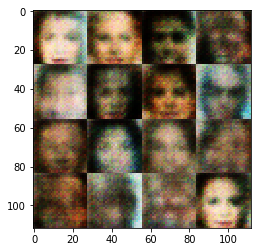

Epoch 1/1... Discriminator Loss: 0.4072... Generator Loss: 1.8222
Epoch 1/1... Discriminator Loss: 0.8790... Generator Loss: 1.4441
Epoch 1/1... Discriminator Loss: 0.6106... Generator Loss: 1.4079
Epoch 1/1... Discriminator Loss: 0.5860... Generator Loss: 1.6122
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 0.5719
Epoch 1/1... Discriminator Loss: 0.4862... Generator Loss: 1.3022
Epoch 1/1... Discriminator Loss: 0.9858... Generator Loss: 1.1874
Epoch 1/1... Discriminator Loss: 0.1476... Generator Loss: 3.3841
Epoch 1/1... Discriminator Loss: 0.5460... Generator Loss: 5.8819
Epoch 1/1... Discriminator Loss: 1.1493... Generator Loss: 0.4978


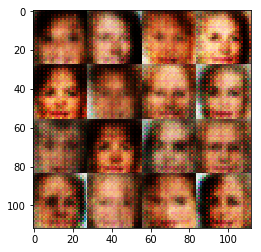

Epoch 1/1... Discriminator Loss: 0.9658... Generator Loss: 0.7253
Epoch 1/1... Discriminator Loss: 1.0007... Generator Loss: 0.9729
Epoch 1/1... Discriminator Loss: 2.4567... Generator Loss: 0.1225
Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 5.4944
Epoch 1/1... Discriminator Loss: 0.6276... Generator Loss: 1.2255
Epoch 1/1... Discriminator Loss: 1.0155... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 0.4845... Generator Loss: 1.7325
Epoch 1/1... Discriminator Loss: 0.9858... Generator Loss: 0.9972
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 2.5751
Epoch 1/1... Discriminator Loss: 0.7734... Generator Loss: 1.1651


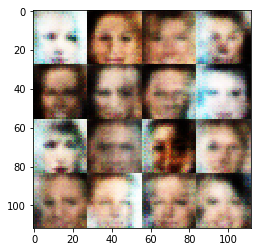

Epoch 1/1... Discriminator Loss: 1.1049... Generator Loss: 0.5493
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.3439
Epoch 1/1... Discriminator Loss: 1.7385... Generator Loss: 0.2642
Epoch 1/1... Discriminator Loss: 1.5525... Generator Loss: 1.1343
Epoch 1/1... Discriminator Loss: 0.7054... Generator Loss: 2.8784
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 1.7878
Epoch 1/1... Discriminator Loss: 0.5156... Generator Loss: 1.4657
Epoch 1/1... Discriminator Loss: 1.4140... Generator Loss: 0.3649
Epoch 1/1... Discriminator Loss: 0.5901... Generator Loss: 1.4845
Epoch 1/1... Discriminator Loss: 0.6664... Generator Loss: 2.5166


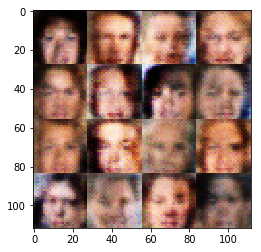

Epoch 1/1... Discriminator Loss: 0.5945... Generator Loss: 3.7537
Epoch 1/1... Discriminator Loss: 0.5217... Generator Loss: 1.9894
Epoch 1/1... Discriminator Loss: 0.9265... Generator Loss: 1.2196
Epoch 1/1... Discriminator Loss: 1.9681... Generator Loss: 0.2775
Epoch 1/1... Discriminator Loss: 1.0087... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.2056... Generator Loss: 0.5584
Epoch 1/1... Discriminator Loss: 0.9054... Generator Loss: 0.8844
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 0.5147
Epoch 1/1... Discriminator Loss: 0.7489... Generator Loss: 0.9459
Epoch 1/1... Discriminator Loss: 0.9199... Generator Loss: 2.2980


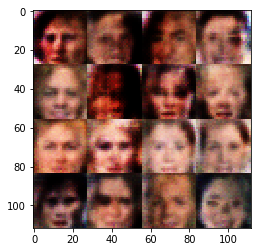

Epoch 1/1... Discriminator Loss: 0.8958... Generator Loss: 0.7103
Epoch 1/1... Discriminator Loss: 2.0683... Generator Loss: 0.1794
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.3874
Epoch 1/1... Discriminator Loss: 0.3043... Generator Loss: 3.6877
Epoch 1/1... Discriminator Loss: 2.3961... Generator Loss: 0.1179
Epoch 1/1... Discriminator Loss: 0.3509... Generator Loss: 1.7380
Epoch 1/1... Discriminator Loss: 0.8514... Generator Loss: 0.7564
Epoch 1/1... Discriminator Loss: 0.3396... Generator Loss: 4.0352
Epoch 1/1... Discriminator Loss: 0.1448... Generator Loss: 4.6523
Epoch 1/1... Discriminator Loss: 0.2464... Generator Loss: 5.3170


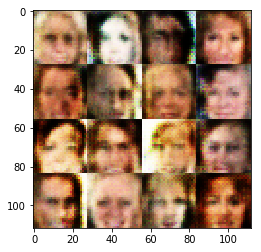

Epoch 1/1... Discriminator Loss: 1.2439... Generator Loss: 0.4517
Epoch 1/1... Discriminator Loss: 1.0007... Generator Loss: 2.5845
Epoch 1/1... Discriminator Loss: 0.1741... Generator Loss: 3.8134
Epoch 1/1... Discriminator Loss: 0.1371... Generator Loss: 3.2072
Epoch 1/1... Discriminator Loss: 1.6056... Generator Loss: 0.2879
Epoch 1/1... Discriminator Loss: 0.3467... Generator Loss: 1.8555
Epoch 1/1... Discriminator Loss: 0.5462... Generator Loss: 5.2837
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 6.9859
Epoch 1/1... Discriminator Loss: 0.3181... Generator Loss: 5.7015
Epoch 1/1... Discriminator Loss: 1.6008... Generator Loss: 0.2699


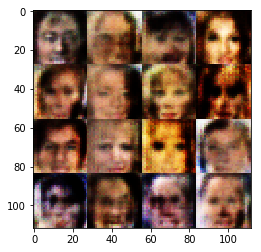

Epoch 1/1... Discriminator Loss: 0.6620... Generator Loss: 1.7806
Epoch 1/1... Discriminator Loss: 0.1446... Generator Loss: 4.0131
Epoch 1/1... Discriminator Loss: 0.2458... Generator Loss: 3.3836
Epoch 1/1... Discriminator Loss: 0.3494... Generator Loss: 4.9958
Epoch 1/1... Discriminator Loss: 0.2974... Generator Loss: 5.1673
Epoch 1/1... Discriminator Loss: 0.3833... Generator Loss: 4.8478
Epoch 1/1... Discriminator Loss: 0.1659... Generator Loss: 2.8614
Epoch 1/1... Discriminator Loss: 0.1874... Generator Loss: 3.6057
Epoch 1/1... Discriminator Loss: 0.5503... Generator Loss: 2.6258
Epoch 1/1... Discriminator Loss: 2.6255... Generator Loss: 0.1348


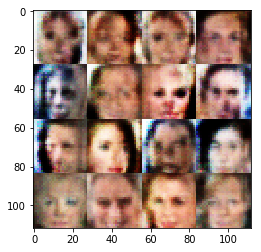

Epoch 1/1... Discriminator Loss: 0.7501... Generator Loss: 0.9917
Epoch 1/1... Discriminator Loss: 0.3185... Generator Loss: 4.1155
Epoch 1/1... Discriminator Loss: 0.4016... Generator Loss: 3.8627
Epoch 1/1... Discriminator Loss: 1.1997... Generator Loss: 2.1695
Epoch 1/1... Discriminator Loss: 0.7424... Generator Loss: 0.8838
Epoch 1/1... Discriminator Loss: 0.2845... Generator Loss: 2.6799
Epoch 1/1... Discriminator Loss: 0.1989... Generator Loss: 2.0310
Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 0.8722
Epoch 1/1... Discriminator Loss: 0.9259... Generator Loss: 0.6277
Epoch 1/1... Discriminator Loss: 0.6125... Generator Loss: 1.1963


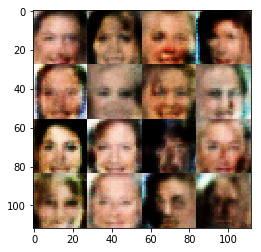

Epoch 1/1... Discriminator Loss: 0.2093... Generator Loss: 2.5991
Epoch 1/1... Discriminator Loss: 0.1953... Generator Loss: 5.9185
Epoch 1/1... Discriminator Loss: 0.9969... Generator Loss: 1.6563
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.4720
Epoch 1/1... Discriminator Loss: 0.3361... Generator Loss: 2.1194
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.6521
Epoch 1/1... Discriminator Loss: 2.2333... Generator Loss: 1.4957
Epoch 1/1... Discriminator Loss: 0.2557... Generator Loss: 6.0648
Epoch 1/1... Discriminator Loss: 0.3440... Generator Loss: 3.0992
Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 0.7408


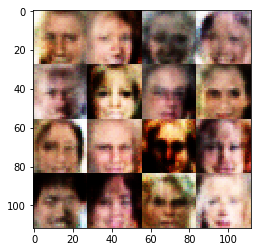

Epoch 1/1... Discriminator Loss: 0.1947... Generator Loss: 2.7928
Epoch 1/1... Discriminator Loss: 0.2314... Generator Loss: 2.5959
Epoch 1/1... Discriminator Loss: 0.9590... Generator Loss: 0.5805
Epoch 1/1... Discriminator Loss: 0.9176... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 0.8090... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 0.1704... Generator Loss: 3.0065
Epoch 1/1... Discriminator Loss: 1.0867... Generator Loss: 7.1631
Epoch 1/1... Discriminator Loss: 2.3601... Generator Loss: 0.1416
Epoch 1/1... Discriminator Loss: 0.6974... Generator Loss: 0.8725
Epoch 1/1... Discriminator Loss: 0.4375... Generator Loss: 1.3294


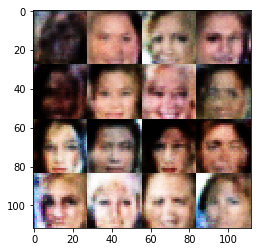

Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 0.5515
Epoch 1/1... Discriminator Loss: 0.1460... Generator Loss: 4.0984
Epoch 1/1... Discriminator Loss: 1.7403... Generator Loss: 0.4467
Epoch 1/1... Discriminator Loss: 0.6623... Generator Loss: 1.0026
Epoch 1/1... Discriminator Loss: 0.3304... Generator Loss: 3.1556
Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 0.0479... Generator Loss: 4.3188
Epoch 1/1... Discriminator Loss: 0.1739... Generator Loss: 6.1529
Epoch 1/1... Discriminator Loss: 0.1364... Generator Loss: 4.5881
Epoch 1/1... Discriminator Loss: 0.5960... Generator Loss: 0.9426


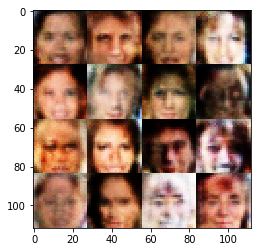

Epoch 1/1... Discriminator Loss: 0.1434... Generator Loss: 2.9690
Epoch 1/1... Discriminator Loss: 2.3191... Generator Loss: 2.4947
Epoch 1/1... Discriminator Loss: 1.1938... Generator Loss: 0.5092
Epoch 1/1... Discriminator Loss: 0.1807... Generator Loss: 2.9967
Epoch 1/1... Discriminator Loss: 0.1575... Generator Loss: 3.7034
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.3660
Epoch 1/1... Discriminator Loss: 0.0997... Generator Loss: 4.5543
Epoch 1/1... Discriminator Loss: 0.1458... Generator Loss: 5.0731
Epoch 1/1... Discriminator Loss: 0.4456... Generator Loss: 1.5811
Epoch 1/1... Discriminator Loss: 0.4844... Generator Loss: 1.1677


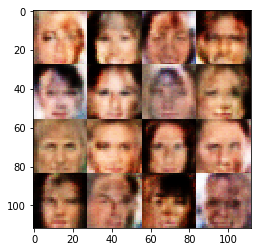

Epoch 1/1... Discriminator Loss: 0.7887... Generator Loss: 5.2716
Epoch 1/1... Discriminator Loss: 0.1527... Generator Loss: 4.0803
Epoch 1/1... Discriminator Loss: 0.3968... Generator Loss: 1.4400
Epoch 1/1... Discriminator Loss: 0.1751... Generator Loss: 4.4159
Epoch 1/1... Discriminator Loss: 0.6136... Generator Loss: 1.7869
Epoch 1/1... Discriminator Loss: 0.2257... Generator Loss: 5.9480
Epoch 1/1... Discriminator Loss: 0.1548... Generator Loss: 7.9550
Epoch 1/1... Discriminator Loss: 0.6170... Generator Loss: 1.1515
Epoch 1/1... Discriminator Loss: 0.0833... Generator Loss: 4.7254
Epoch 1/1... Discriminator Loss: 0.8131... Generator Loss: 1.2184


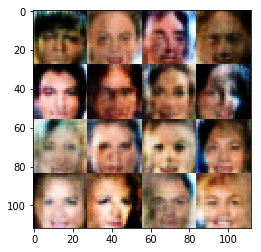

Epoch 1/1... Discriminator Loss: 1.4772... Generator Loss: 0.5519
Epoch 1/1... Discriminator Loss: 1.4758... Generator Loss: 1.5469
Epoch 1/1... Discriminator Loss: 0.2693... Generator Loss: 1.9948
Epoch 1/1... Discriminator Loss: 0.3682... Generator Loss: 1.7136
Epoch 1/1... Discriminator Loss: 0.1824... Generator Loss: 4.3313
Epoch 1/1... Discriminator Loss: 0.4515... Generator Loss: 3.1449
Epoch 1/1... Discriminator Loss: 0.1788... Generator Loss: 2.8702
Epoch 1/1... Discriminator Loss: 0.2139... Generator Loss: 3.9574
Epoch 1/1... Discriminator Loss: 1.8435... Generator Loss: 3.1766
Epoch 1/1... Discriminator Loss: 0.5953... Generator Loss: 1.2340


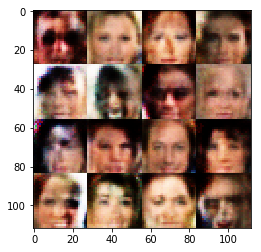

Epoch 1/1... Discriminator Loss: 0.2741... Generator Loss: 2.0735
Epoch 1/1... Discriminator Loss: 0.1411... Generator Loss: 3.5393
Epoch 1/1... Discriminator Loss: 0.7725... Generator Loss: 0.7406
Epoch 1/1... Discriminator Loss: 0.1851... Generator Loss: 4.2721
Epoch 1/1... Discriminator Loss: 0.0750... Generator Loss: 5.9620
Epoch 1/1... Discriminator Loss: 1.4846... Generator Loss: 4.0637
Epoch 1/1... Discriminator Loss: 0.7426... Generator Loss: 5.5324
Epoch 1/1... Discriminator Loss: 0.5048... Generator Loss: 1.3351
Epoch 1/1... Discriminator Loss: 0.2774... Generator Loss: 2.0173
Epoch 1/1... Discriminator Loss: 0.6631... Generator Loss: 1.4994


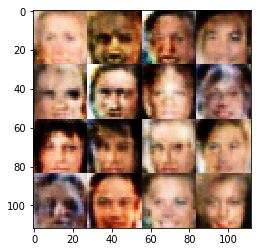

Epoch 1/1... Discriminator Loss: 0.7545... Generator Loss: 0.8490
Epoch 1/1... Discriminator Loss: 0.2127... Generator Loss: 2.8110
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.3772
Epoch 1/1... Discriminator Loss: 0.5306... Generator Loss: 1.6602
Epoch 1/1... Discriminator Loss: 0.1454... Generator Loss: 3.4373
Epoch 1/1... Discriminator Loss: 0.2998... Generator Loss: 1.7657
Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 2.0593
Epoch 1/1... Discriminator Loss: 0.8997... Generator Loss: 1.9437
Epoch 1/1... Discriminator Loss: 0.0806... Generator Loss: 4.6448
Epoch 1/1... Discriminator Loss: 0.3969... Generator Loss: 6.0771


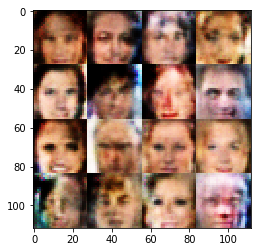

Epoch 1/1... Discriminator Loss: 2.0020... Generator Loss: 0.6404
Epoch 1/1... Discriminator Loss: 0.3152... Generator Loss: 2.1281
Epoch 1/1... Discriminator Loss: 0.1651... Generator Loss: 3.7741
Epoch 1/1... Discriminator Loss: 0.4475... Generator Loss: 1.4598
Epoch 1/1... Discriminator Loss: 0.1944... Generator Loss: 2.6081
Epoch 1/1... Discriminator Loss: 0.3243... Generator Loss: 2.1758
Epoch 1/1... Discriminator Loss: 1.7474... Generator Loss: 0.5169
Epoch 1/1... Discriminator Loss: 1.1277... Generator Loss: 0.9000
Epoch 1/1... Discriminator Loss: 1.1213... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.8114


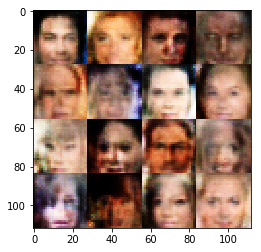

Epoch 1/1... Discriminator Loss: 1.0252... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 1.4029... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 0.9727
Epoch 1/1... Discriminator Loss: 1.1474... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 1.0857
Epoch 1/1... Discriminator Loss: 1.0559... Generator Loss: 0.8397
Epoch 1/1... Discriminator Loss: 1.1024... Generator Loss: 0.9155
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 1.0252
Epoch 1/1... Discriminator Loss: 0.9392... Generator Loss: 0.9169


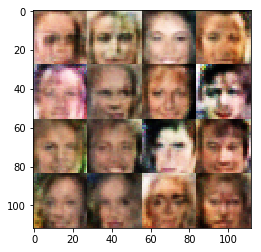

Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 0.9233... Generator Loss: 1.0802
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 1.0199
Epoch 1/1... Discriminator Loss: 0.8858... Generator Loss: 1.0444
Epoch 1/1... Discriminator Loss: 0.7769... Generator Loss: 1.1998
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 0.9152
Epoch 1/1... Discriminator Loss: 0.9082... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 0.9111... Generator Loss: 1.0944
Epoch 1/1... Discriminator Loss: 1.0247... Generator Loss: 0.9476
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 0.9467


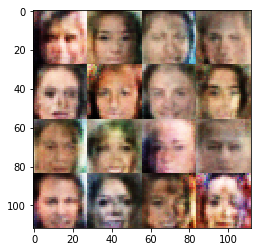

Epoch 1/1... Discriminator Loss: 0.8402... Generator Loss: 1.3386
Epoch 1/1... Discriminator Loss: 0.9541... Generator Loss: 1.0562
Epoch 1/1... Discriminator Loss: 0.8905... Generator Loss: 0.8231
Epoch 1/1... Discriminator Loss: 0.7844... Generator Loss: 1.2405
Epoch 1/1... Discriminator Loss: 0.9165... Generator Loss: 0.8769
Epoch 1/1... Discriminator Loss: 0.8736... Generator Loss: 1.0968
Epoch 1/1... Discriminator Loss: 0.9530... Generator Loss: 1.1162
Epoch 1/1... Discriminator Loss: 0.8487... Generator Loss: 0.9142
Epoch 1/1... Discriminator Loss: 0.7711... Generator Loss: 1.2218
Epoch 1/1... Discriminator Loss: 0.8423... Generator Loss: 0.9602


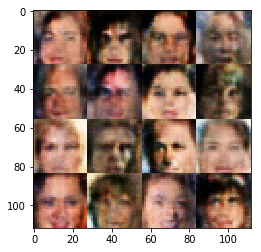

Epoch 1/1... Discriminator Loss: 0.5698... Generator Loss: 2.2021
Epoch 1/1... Discriminator Loss: 0.8596... Generator Loss: 0.8810
Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 1.3405
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 0.8570
Epoch 1/1... Discriminator Loss: 0.7979... Generator Loss: 1.1874
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 0.5057
Epoch 1/1... Discriminator Loss: 0.7930... Generator Loss: 1.0727
Epoch 1/1... Discriminator Loss: 0.7890... Generator Loss: 1.5353
Epoch 1/1... Discriminator Loss: 1.0819... Generator Loss: 0.5535
Epoch 1/1... Discriminator Loss: 0.2792... Generator Loss: 1.9808


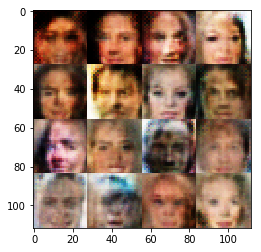

Epoch 1/1... Discriminator Loss: 0.7614... Generator Loss: 2.4089
Epoch 1/1... Discriminator Loss: 0.5597... Generator Loss: 1.0962
Epoch 1/1... Discriminator Loss: 0.5137... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 0.2111... Generator Loss: 2.2309
Epoch 1/1... Discriminator Loss: 0.6794... Generator Loss: 1.3046
Epoch 1/1... Discriminator Loss: 0.0789... Generator Loss: 3.3913
Epoch 1/1... Discriminator Loss: 0.1553... Generator Loss: 2.6624
Epoch 1/1... Discriminator Loss: 0.6486... Generator Loss: 2.8612
Epoch 1/1... Discriminator Loss: 0.4977... Generator Loss: 1.1774
Epoch 1/1... Discriminator Loss: 0.1394... Generator Loss: 2.4476


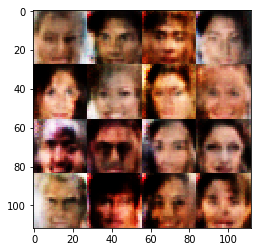

Epoch 1/1... Discriminator Loss: 0.2020... Generator Loss: 2.1646
Epoch 1/1... Discriminator Loss: 0.4129... Generator Loss: 1.3122
Epoch 1/1... Discriminator Loss: 0.6292... Generator Loss: 0.9472
Epoch 1/1... Discriminator Loss: 0.0866... Generator Loss: 3.6258
Epoch 1/1... Discriminator Loss: 1.9628... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.4999... Generator Loss: 0.4322
Epoch 1/1... Discriminator Loss: 0.6025... Generator Loss: 1.1312
Epoch 1/1... Discriminator Loss: 0.8176... Generator Loss: 1.1788
Epoch 1/1... Discriminator Loss: 0.8352... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.5167... Generator Loss: 3.4981


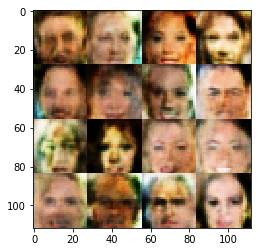

Epoch 1/1... Discriminator Loss: 0.2897... Generator Loss: 2.7978
Epoch 1/1... Discriminator Loss: 0.8358... Generator Loss: 2.5792
Epoch 1/1... Discriminator Loss: 0.6820... Generator Loss: 0.9380
Epoch 1/1... Discriminator Loss: 0.3262... Generator Loss: 3.3275
Epoch 1/1... Discriminator Loss: 0.6819... Generator Loss: 3.1455
Epoch 1/1... Discriminator Loss: 0.0718... Generator Loss: 3.8183
Epoch 1/1... Discriminator Loss: 0.8174... Generator Loss: 1.5793
Epoch 1/1... Discriminator Loss: 1.0341... Generator Loss: 0.9321
Epoch 1/1... Discriminator Loss: 0.9645... Generator Loss: 1.1262
Epoch 1/1... Discriminator Loss: 0.9077... Generator Loss: 1.1355


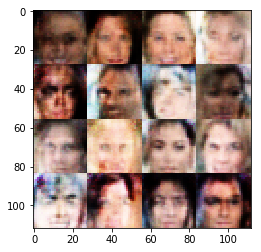

Epoch 1/1... Discriminator Loss: 0.3654... Generator Loss: 2.4268
Epoch 1/1... Discriminator Loss: 0.8755... Generator Loss: 1.0969
Epoch 1/1... Discriminator Loss: 0.7247... Generator Loss: 0.9753
Epoch 1/1... Discriminator Loss: 1.0855... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 0.9142... Generator Loss: 0.8755
Epoch 1/1... Discriminator Loss: 0.7818... Generator Loss: 1.1643
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 0.8470... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 0.6098... Generator Loss: 4.9397
Epoch 1/1... Discriminator Loss: 0.7439... Generator Loss: 3.3095


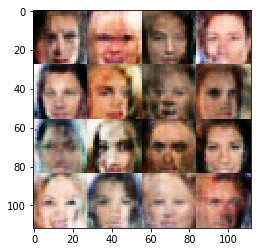

Epoch 1/1... Discriminator Loss: 0.8646... Generator Loss: 0.8204
Epoch 1/1... Discriminator Loss: 0.3913... Generator Loss: 1.8011
Epoch 1/1... Discriminator Loss: 0.7987... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 0.8989... Generator Loss: 0.9968
Epoch 1/1... Discriminator Loss: 0.4505... Generator Loss: 1.3442
Epoch 1/1... Discriminator Loss: 0.3492... Generator Loss: 2.0075
Epoch 1/1... Discriminator Loss: 0.4318... Generator Loss: 1.3917
Epoch 1/1... Discriminator Loss: 0.7278... Generator Loss: 1.0471
Epoch 1/1... Discriminator Loss: 0.7464... Generator Loss: 1.1881
Epoch 1/1... Discriminator Loss: 1.0194... Generator Loss: 0.7584
Epoch 1/1... Discriminator Loss: 0.8113... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 0.8011... Generator Loss: 1.8614
Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 1.6331
Epoch 1/1... Discriminator Loss: 0.2345... Generator Loss: 2.6753
Epoch 1/1... Discriminator Loss: 0.2104... Generator Loss: 1.9741


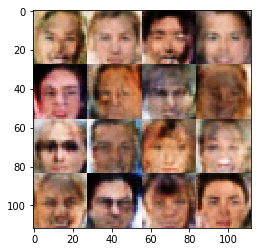

Epoch 1/1... Discriminator Loss: 1.2663... Generator Loss: 0.5189
Epoch 1/1... Discriminator Loss: 0.6465... Generator Loss: 1.3890
Epoch 1/1... Discriminator Loss: 0.7042... Generator Loss: 1.1367
Epoch 1/1... Discriminator Loss: 0.0755... Generator Loss: 5.3051
Epoch 1/1... Discriminator Loss: 1.4839... Generator Loss: 0.3651
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 2.7070


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.45


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.